In [1]:
%%capture

from google.colab import drive, files
drive.mount('/content/drive/')
%cd /content/drive/My Drive/AI/NewsCrawl

In [2]:
import pandas as pd
import numpy as np
from glob import glob
import pandas as pd
import numpy as np
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset = []
# dataset.extend(glob('./vnexpress-dataset/vnexpress-dataset-origin/*.xlsx'))
# dataset.extend(glob('./dantri-dataset/dantri-dataset-origin/*.xlsx'))
dataset.extend(glob('./vnexpress-dantri-merged/*.xlsx'))
dataset

['./vnexpress-dantri-merged/thoi-su.xlsx',
 './vnexpress-dantri-merged/the-gioi.xlsx',
 './vnexpress-dantri-merged/kinh-doanh.xlsx',
 './vnexpress-dantri-merged/the-thao.xlsx',
 './vnexpress-dantri-merged/giai-tri.xlsx',
 './vnexpress-dantri-merged/phap-luat.xlsx',
 './vnexpress-dantri-merged/suc-khoe.xlsx',
 './vnexpress-dantri-merged/giao-duc.xlsx',
 './vnexpress-dantri-merged/khoa-hoc-cong-nghe.xlsx',
 './vnexpress-dantri-merged/du-lich.xlsx',
 './vnexpress-dantri-merged/oto-xe-may.xlsx']

In [23]:
# vn = pd.read_excel('./vnexpress-dataset/vnexpress-dataset-origin/vnexpress-oto-xe-may.xlsx')
# # vn.append(pd.read_excel('./vnexpress-dataset/vnexpress-dataset-origin/vnexpress-so-hoa.xlsx'))

# da = pd.read_excel( './vnexpress-dataset/vnexpress-dataset-origin/vnexpress-oto-xe-may.xlsx')
# # da.append(pd.read_excel('./dantri-dataset/dantri-dataset-origin/dantri-kinh-doanh.xlsx'))

# merge_df = vn.append(da, ignore_index=True)
# merge_df.dropna(inplace = True)

# # Gán label
# temp = []
# for label in merge_df['label']:
#     temp.append(10)
# merge_df.drop("label", axis = 1)
# merge_df["label"] = temp

# merge_df.to_excel("vnexpress-dantri-merged/oto-xe-may.xlsx", index=False)

In [25]:
# train_df = pd.DataFrame()
# test_df = pd.DataFrame()
# for data in dataset:
#         df = pd.read_excel(data)
#         train_df = train_df.append(df[1000:], ignore_index=True)
#         test_df = test_df.append(df[:1000], ignore_index=True)
        

# train_df.dropna(inplace = True) # Loại bỏ null
# test_df.dropna(inplace = True) # Loại bỏ null

In [29]:
# train_df.to_excel('./vnexpress-dantri-merged/train.xlsx')
# test_df.to_excel('./vnexpress-dantri-merged/test.xlsx')

In [30]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()
train_df = train_df.append(pd.read_excel('./vnexpress-dantri-merged/train.xlsx'), ignore_index=True)
test_df = test_df.append(pd.read_excel('./vnexpress-dantri-merged/test.xlsx'), ignore_index=True)
train_df.dropna(inplace = True) # Loại bỏ null
test_df.dropna(inplace = True) # Loại bỏ null

In [31]:
train_df.head()

,Unnamed: 0,id,title,content,label
0,0,2fdc17c5-3abc-4a32-b565-4f9a31b0b63f,Đề xuất xây đường kéo dài đại lộ Thăng Long,"Ngày 17/5, đại diện Bộ Giao thông Vận tải cho ...",0
1,1,4fa7b6b0-5969-4927-9392-d9981971d3e3,Đề xuất xây thêm bãi đỗ xe tại sân bay Nội Bài,Theo đề xuất của Cục Hàng không Việt Nam gửi B...,0
2,2,ef592a33-23e7-496e-a7bd-0cef5f4b3cd2,Đề xuất xóa 4 tổng cục thuộc Bộ Nông nghiệp,"Theo dự thảo nghị định quy định chức năng, nhi...",0
3,3,3a699019-f1a8-4d25-8427-1f1e62329521,Đề xuất xử lý hình sự hành vi thu gom sổ bảo h...,"Kiến nghị được Giám đốc Sở Lao động, Thương bi...",0
4,4,582a4158-78be-44a0-b7e9-9019abfbf1ad,Đêm hội trăng rằm của trẻ có hoàn cảnh khó khăn,Chương trình mở cửa miễn phí với nhiều tiết mụ...,0


In [32]:
test_df.head()

,Unnamed: 0,id,title,content,label
0,0,efde56c2-b0d4-4aef-91dd-874058c186ac,1.000 ha dừa Bến Tre nhiễm sâu đầu đen,"Sáng gần giữa tháng tư, ông Nguyễn Long Hổ (50...",0
1,1,26af923d-7550-4d59-a5cd-1ccfb2e988ff,1.000 túi thuốc hỗ trợ F0 điều trị tại nhà,"Sáng 17/9, 1.000 túi thuốc đóng gói sẵn được c...",0
2,2,9bc5be8f-460f-46e7-b418-3e3a3464e43e,1/4 số thực tập sinh Nhật Bản trở về Việt Nam ...,Cơ quan Hợp tác Quốc tế Nhật Bản (JICA) vừa cô...,0
3,3,adfad0b4-7924-483e-ac26-2e12de121ca0,"1,5 triệu người chưa nhận, TP HCM kéo dài hỗ t...","Chiều 22/10, Giám đốc Sở Lao động, Thương binh...",0
4,4,2e4ab952-2a50-41fc-a32b-f40c51495157,1.500 tỷ đồng xây mới cầu Trà Khúc 1,"Chiều 19/4, Chủ tịch UBND Quảng Ngãi Đặng Văn ...",0


In [33]:
labels = []
for label in train_df['label']:
    labels.append(label)


labels = list(set(labels))
print(f"Có tổng cộng {len(labels)} nhãn")
print(list(set(labels)))

Có tổng cộng 11 nhãn
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [35]:
id2label = {
    0: 'thời sự',
    1: 'thế giới',
    2: 'kinh doanh',
    3: 'thể thao',
    4: 'giải trí',
    5: 'pháp luật',
    6: 'sức khỏe',
    7: 'giáo dục',
    8: 'khoa học - công nghệ',
    9: 'du lịch - ẩm thực',
    10: 'oto xe máy'
}


label_names = [id2label[i] for i in range(len(labels))]
print(label_names)

['thời sự', 'thế giới', 'kinh doanh', 'thể thao', 'giải trí', 'pháp luật', 'sức khỏe', 'giáo dục', 'khoa học - công nghệ', 'du lịch - ẩm thực', 'oto xe máy']


In [36]:
def get_corpus_and_label(df):
    title = [title for title in df['title']]
    content = [content for content in df['content']]
    label = [label for label in df['label']]

    corpus = []
    for index in range(len(title)):
        # merge tiêu đề và nội dung bài viết
        text = title[index] + ' ' + content[index]
        corpus.append(text)
    
    return label, corpus

In [37]:
# Lấy nhãn và corpus từ dataset

label, corpus = get_corpus_and_label(train_df)
label1, corpus1 = get_corpus_and_label(test_df)

In [38]:
# Train

cv = CountVectorizer(ngram_range=(1, 1), max_features=5000)
x_train = cv.fit_transform(corpus).toarray()
y_train = np.array(label)
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [39]:
# Test

x_test = cv.transform(corpus1).toarray()
y_test = np.array(label1)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8129090909090909

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.88      0.71      0.79      1000
           2       0.78      0.83      0.81      1000
           3       0.96      0.94      0.95      1000
           4       0.70      0.86      0.77      1000
           5       0.87      0.73      0.79      1000
           6       0.79      0.85      0.82      1000
           7       0.81      0.90      0.85      1000
           8       0.88      0.53      0.66      1000
           9       0.71      0.89      0.79      1000
          10       0.91      0.96      0.94      1000

    accuracy                           0.81     11000
   macro avg       0.82      0.81      0.81     11000
weighted avg       0.82      0.81      0.81     11000



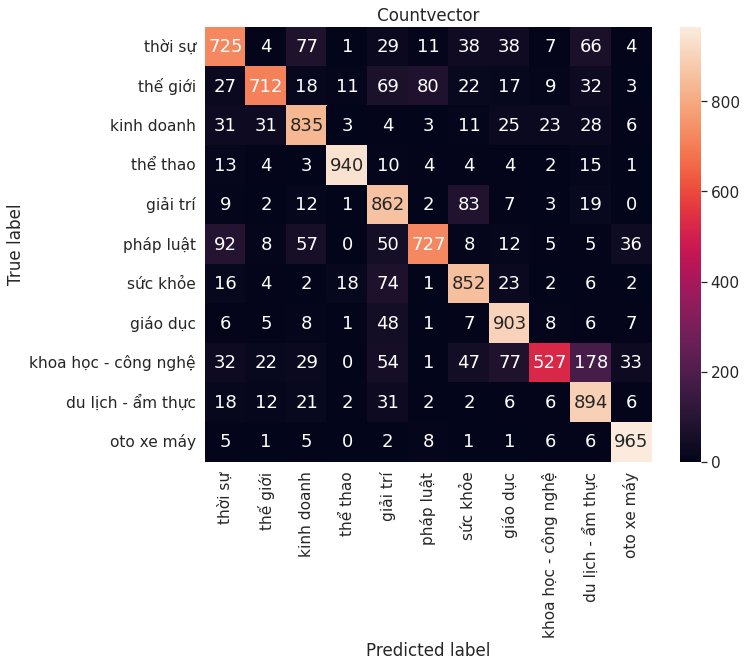

In [41]:
sns.set(font_scale=1.4)
cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = label_names, 
                     columns = label_names)

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt="d",annot_kws={"size": 18})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Countvector')
plt.show()